# **lithomap**

## 2D geometry layout for lithography masks

A 2D geometry layout and visualization framework for creating lithography masks, with the ability to create wafer and chip maps for an easy-to-reference layout of the litho structures. The map can be thought of as a cartoon version to illustrate the shapes, dimensions, and annotations of the mask layout in a more comprehensible way.

add example
<!-- ## Example -->

<!-- Show actual chip layout vs chip map -->

### Elements

The basic building block is an **Element** which can contain various shapes.

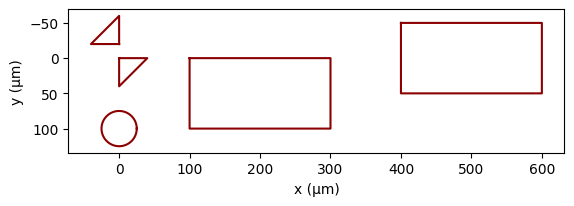

In [1]:
import matplotlib
import numpy as np
from lithomap import *
e = Element(name='shapes',layer='MASK')
e.addrect(x0=100,y0=0,dx=200,dy=100)
e.addcenteredrect(x0=500,y0=0,dx=200,dy=100)
e.addcircle(x0=0,y0=100,r=25)
polygon = [(0,0),(40,0),(0,40),(0,0)]
e.addpoly(polygon)
xs,ys = [0,-40,0],[-20,-20,-60]
e.addxypoly(xs,ys,autoclose=True)
e.plot();

Various operations are available such a translating and scaling. Methods can be chained.

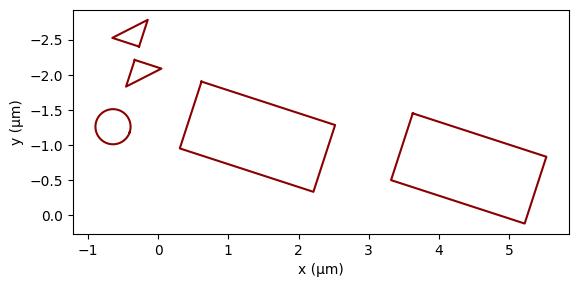

In [2]:
e.translate(-100,-200).scale(0.01).rotate(np.pi/10)
e.plot();

Elements can also contain **Notes**, which are the building blocks for creating annotated wafer maps and chip maps.

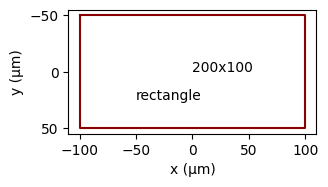

In [3]:
ee = Element(name='shapes',layer='MASK')
ee.addcenteredrect(x0=0,y0=0,dx=200,dy=100)
ee.addnote(x=0,y=0,note='200x100')
ee.addnote(x=-50,y=25,note='rectangle')
ee.plot(scale=0.5);

Elements can have subelements, all of which are typically belong to a single parent mask element. Subelements can futher have subelements of their own. The root element must have a layer defined, typically 'MASK'; subelements will by default have the same layer. It is recommended to always name new elements.

Dec99mask maskname:Dec99mask
	►glasses 
		►L 
		►R 


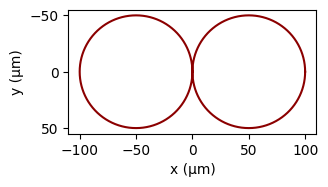

In [4]:
mask0 = Element(name='Dec99mask',layer='MASK')
eyeglasses = Element(parent=mask0,name='glasses')
eyeL = Element(parent=eyeglasses,name='L').addcircle(x0=-50,y0=0,r=50)
eyeR = Element(parent=eyeglasses,name='R').addcircle(x0=+50,y0=0,r=50)
print(mask0)
mask0.plot(scale=0.5);

Text elements can also be added. Note how the letters 'e' and 'o' are formed and how text must be inset. Shapes that are contained inside of other shapes are not allowed.

Dec99mask maskname:Dec99mask,text: 123 Hello
	►text 
	►text2 


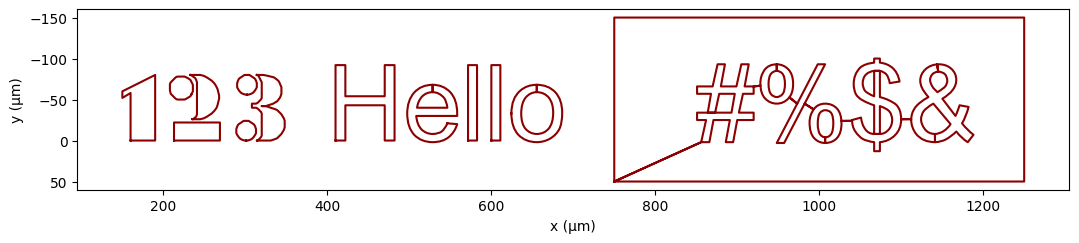

In [5]:
mask1 = Element(name='Dec99mask',layer='MASK')
mask1.addtext('123',x=150,y=0)
mask1.addtext('Hello',x=400,y=0,font='c:/Windows/Fonts/arial.ttf')
box = [(750+500*x,50-200*y) for x,y in zip([0,1,1,0,0],[0,0,1,1,0])]
mask1.addinsettext(polylist=[box],s='#%$&',x0=850,y0=0,font='c:/Windows/Fonts/arial.ttf')
print(mask1)
mask1.plot(scale=2);

### Building a chip

A **Chip** is an element that has an extra feature to keep track of chip number

In [6]:
mask1 = Element(name='mask1',layer='MASK')
a = Chip(parent=mask1)
b = Chip(parent=mask1)
print(a.info.chipid)
print(b.info.chipid)
print('chipcount:',mask1.info.chipcount);

01A
02A
chipcount: 2


Information can be specified for an element using it's **info** attribute. It is a python dictionary that can be accessed via 'dot notation'. Subelements can then use this for 'default' values. For instance, a default chip width and length can be specified for the whole mask, and width and length do not have to be specified for each chip individually. A method such as **adddiceguides** will then look for a default value of **chipwidth** and **chiplength** if not explicitly specified and use those values for drawing the dice guide dimensions.

When the mask is rendered values in the info attribute for all elements and subelements will be saved in text format for permanent reference, so be liberal in adding any information that may be useful at a later date.

chiplength:5000,chipwidth:500,font:c:/Windows/Fonts/arial.ttf,maskname:mask2,minfeature:1.0


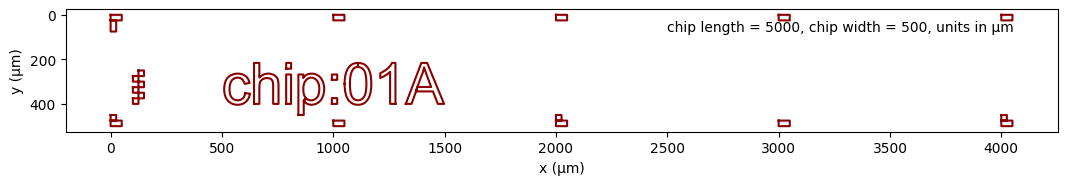

In [7]:
mask2 = Element(name='mask2',layer='MASK')
mask2.info.font = 'c:/Windows/Fonts/arial.ttf'
mask2.info.minfeature = 1.0
mask2.info.chiplength = 5000
mask2.info.chipwidth = 500
print(mask2.info)
chip = Chip(parent=mask2)
chip.adddiceguides()
chip.addmetric(x=100,y=400,dx=25,dy=25,nx=2,ny=6)
chip.addtext('chip:'+chip.info.chipid,x=500,y=400,scale=2)
chip.addscalenote(poling=False);
chip.plot(scale=2);

chiplength:5000,chipwidth:500,font:c:/Windows/Fonts/arial.ttf,maskname:mask2,minfeature:1.0


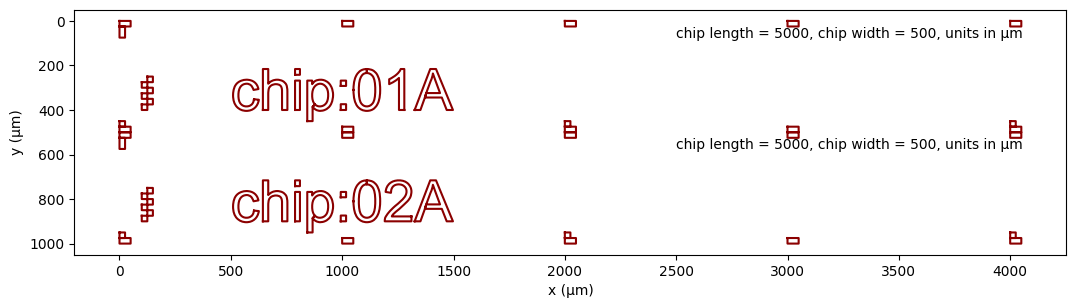

In [8]:
mask2 = Element(name='mask2',layer='MASK')
mask2.info.font = 'c:/Windows/Fonts/arial.ttf'
mask2.info.minfeature = 1.0
mask2.info.chiplength = 5000
mask2.info.chipwidth = 500
print(mask2.info)
def addchip(mask,x,y):
    chip = Chip(parent=mask2)
    chip.adddiceguides()
    chip.addmetric(x=100,y=400,dx=25,dy=25,nx=2,ny=6)
    chip.addtext('chip:'+chip.info.chipid,x=500,y=400,scale=2)
    chip.addscalenote(poling=False)
    chip.translate(x,y)
addchip(mask2,0,0)
addchip(mask2,0,500)
mask2.plot(scale=2);

Typical **info** attributes:

In [9]:
mask = Element(layer='MASK')
mask.info.minfeature = 1.0
mask.info.font = 'arial.ttf'
mask.info.chiplength = 55000
mask.info.chipwidth = 2000
mask.info.rows = 20
mask.info.columns = 4
mask.info.dicegap = 750
mask.info.chipcount = 0
mask.info.maskname
chip.info.chipid
chip.info.vgroovepitch = 127
chip.info.sbendlength = 2400
chip.info.modefilterlength = 3000
chip.info.taperlength = 2500

### Building a litho mask

### Wafer map

### Chip maps


### Rendering to dxf, svg, png

### Layers

### Poling waveguide mask

### Electrode waveguide mask

### Fiducials and metrics

### Submount mask